In [2]:
import pandas as pd
df= pd.read_csv("loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [3]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le

LabelEncoder()

In [4]:
df.loan_status =le.fit_transform(df.loan_status)
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,0
1,45,Female,Teacher,Master's,Single,62000,680,0
2,28,Male,Student,High School,Single,25000,590,1
3,51,Female,Manager,Bachelor's,Married,105000,780,0
4,36,Male,Accountant,Bachelor's,Married,75000,710,0
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,0
57,25,Female,Receptionist,High School,Single,32000,570,1
58,43,Male,Banker,Bachelor's,Married,95000,760,0
59,30,Female,Writer,Master's,Single,55000,650,0


In [5]:
df_new= df.drop(['gender', 'occupation', 'education_level', 'marital_status', 'income'], axis=1)

In [6]:
df_new.loan_status= le.fit_transform(df.loan_status)
df_new

,age,credit_score,loan_status
0,32,720,0
1,45,680,0
2,28,590,1
3,51,780,0
4,36,710,0
...,...,...,...
56,39,770,0
57,25,570,1
58,43,760,0
59,30,650,0


In [7]:
x = df_new.drop("loan_status",axis=1)

In [8]:
y = df_new.loan_status

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
model.predict([[45,900]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [14]:
y_pred= model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
y_test

46    0
58    0
23    1
52    0
57    1
19    0
34    1
32    0
30    1
41    0
51    1
17    0
14    0
10    0
60    0
45    0
Name: loan_status, dtype: int64

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

[Text(0.6, 0.875, 'x[1] <= 665.0\ngini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(0.4, 0.625, 'x[1] <= 645.0\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6, 0.375, 'x[0] <= 29.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]')]

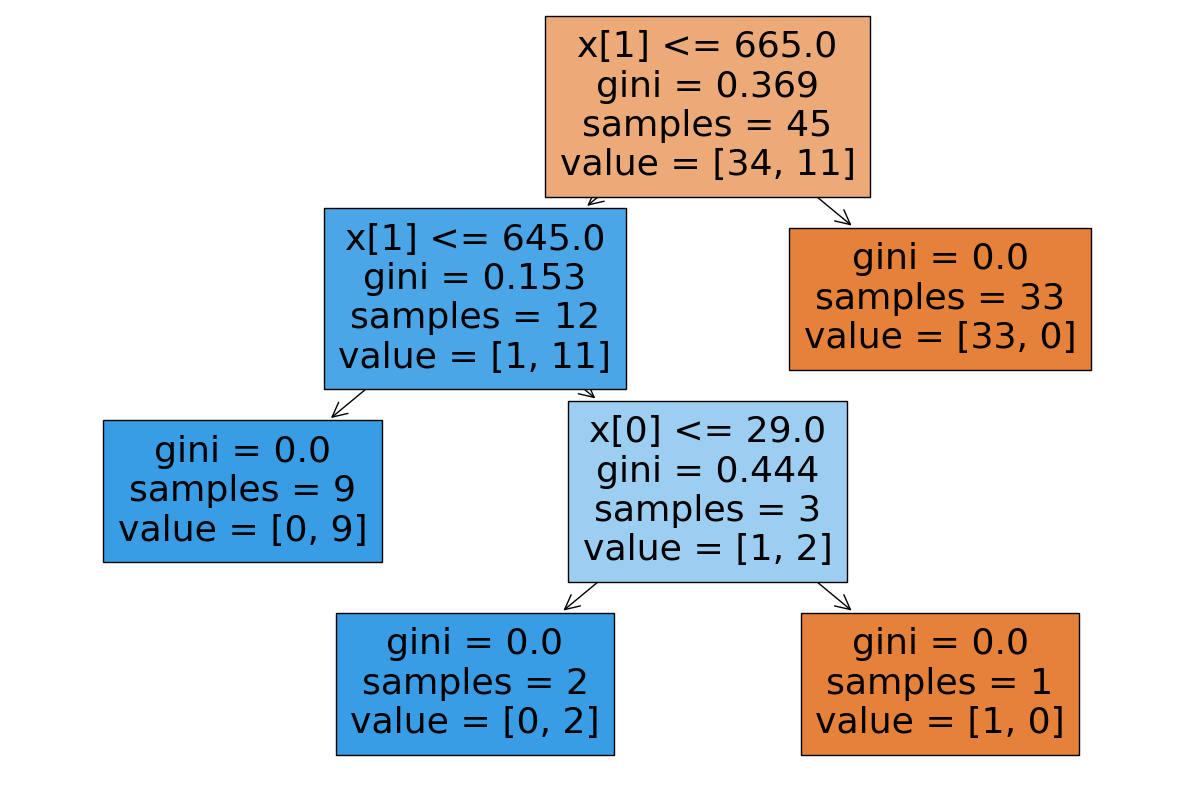

In [17]:
import matplotlib.pyplot as plt
from sklearn import  tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)